In [1]:
import time
import requests
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import re
import pandas as pd

from selenium import webdriver
from matplotlib import rc
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [2]:
options = webdriver.ChromeOptions()
options.add_experimental_option('excludeSwitches', ['enable-logging'])
wd = webdriver.Chrome('./chromedriver.exe',options=options)

C:\Users\admin\AppData\Local\Temp\ipykernel_12624\1218337680.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  wd = webdriver.Chrome('./chromedriver.exe',options=options)


In [3]:
star_url = 'https://www.starbucks.co.kr/store/store_map.do'
wd.get(star_url)

In [4]:
# selenium 4 버전 변경되면서 함수원형 수정됨
# 새 패키지 추가
from selenium.webdriver.common.by import By

In [5]:
# TIP!
# wd.find_element_by_xpath('//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/header[2]/h3/a').click()
wd.find_element(By.XPATH,'//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/header[2]/h3/a').click()
time.sleep(2)
wd.find_element(By.XPATH,'//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/article[2]/div[1]/div[2]/ul/li[1]/a').click()
time.sleep(2)
wd.find_element(By.XPATH,'//*[@id="mCSB_2_container"]/ul/li[1]/a').click()

In [6]:
req = wd.page_source
soup = BeautifulSoup(req, "html.parser")
info = soup.find("div", id = "mCSB_3_container").find_all("li", class_ = 'quickResultLstCon')
len(info), info[0]

(588,
 <li class="quickResultLstCon" data-code="3762" data-hlytag="null" data-index="0" data-lat="37.501087" data-long="127.043069" data-name="역삼아레나빌딩" data-storecd="1509" style="background:#fff"> <strong data-my_siren_order_store_yn="N" data-name="역삼아레나빌딩" data-store="1509" data-yn="N">역삼아레나빌딩  </strong> <p class="result_details">서울특별시 강남구 언주로 425 (역삼동)<br/>1522-3232</p> <i class="pin_general">리저브 매장 2번</i></li>)

In [7]:
name = info[0].find("strong").text.strip()
address = info[0].find(class_="result_details").text.strip()[:-9]
place = address.split(" ")[1]

name, address, place

('역삼아레나빌딩', '서울특별시 강남구 언주로 425 (역삼동)', '강남구')

In [8]:
star_info = []
for item in info :
    name = item.find("strong").text.strip()
    address = item.find(class_="result_details").text.strip()[:-9]
    place = address.split(" ")[1]
   
    data = {
        "가게명" : name,
        "주소" : address,
        "구" : place
    }
    star_info.append(data)
len(star_info)

588

In [9]:
df_star = pd.DataFrame(star_info, columns = ['가게명', '구', '주소'])
df_star.tail()

,가게명,구,주소
583,중랑구청,중랑구,서울특별시 중랑구 신내로 72
584,사가정역,중랑구,서울특별시 중랑구 면목로 310
585,상봉역,중랑구,서울특별시 중랑구 망우로 307 (상봉동)
586,묵동,중랑구,"서울특별시 중랑구 동일로 952 (묵동, 로프트원 태릉입구역) 1층"
587,중화역,중랑구,서울특별시 중랑구 봉화산로 35


In [10]:
gu_list = list(set(df_star["구"]))
gu_list

['도봉구',
 '성동구',
 '중랑구',
 '강동구',
 '영등포구',
 '용산구',
 '강남구',
 '강서구',
 '관악구',
 '서초구',
 '광진구',
 '동대문구',
 '구로구',
 '동작구',
 '금천구',
 '마포구',
 '송파구',
 '중구',
 '강북구',
 '양천구',
 '성북구',
 '서대문구',
 '종로구',
 '노원구',
 '은평구']

In [11]:
edi_url = "https://www.ediya.com/contents/find_store.html"
wd = webdriver.Chrome("./chromedriver.exe", options=options)
wd.get(edi_url)

C:\Users\admin\AppData\Local\Temp\ipykernel_12624\1577385957.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  wd = webdriver.Chrome("./chromedriver.exe", options=options)


In [12]:
edi_info = []



for gu in gu_list:
    wd.find_element(By.XPATH,'//*[@id="contentWrap"]/div[3]/div/div[1]/ul/li[2]/a').click()
    wd.find_element(By.XPATH,'//*[@id="keyword"]').clear
    wd.find_element(By.XPATH,'//*[@id="keyword"]').send_keys("서울 " + gu)
    wd.find_element(By.XPATH,'//*[@id="keyword_div"]/form/button').click()
    
    html = wd.page_source
    soup = BeautifulSoup(html, "html.parser")
    
    info = soup.find("ul", id = "placesList").find_all("li", class_='item')
    
    for item in info:
        name = item.find("dt").text
        address = item.find("dd").text.strip()
        place = address.split(" ")[1]
        

        data = {
            "가게명" : name,
            "구" : place,
            "주소" : address,
        }
        edi_info.append(data)
 
len(edi_info)

692

In [13]:
df_star = pd.DataFrame(star_info, columns = ['가게명', '구', '주소'])
df_star.tail()

,가게명,구,주소
583,중랑구청,중랑구,서울특별시 중랑구 신내로 72
584,사가정역,중랑구,서울특별시 중랑구 면목로 310
585,상봉역,중랑구,서울특별시 중랑구 망우로 307 (상봉동)
586,묵동,중랑구,"서울특별시 중랑구 동일로 952 (묵동, 로프트원 태릉입구역) 1층"
587,중화역,중랑구,서울특별시 중랑구 봉화산로 35


In [14]:
df_edi = pd.DataFrame(edi_info)
df_edi.tail()

,가게명,구,주소
687,중계점,노원구,서울 노원구 동일로204가길 34 (중계동)
688,중계중앙점,노원구,서울 노원구 덕릉로73길 18 (중계동)
689,태릉입구역점,노원구,"서울 노원구 공릉로 105 (공릉동, 성종빌딩)"
690,하계온천점,노원구,서울 노원구 노원로 257 (하계동)
691,하계을지점,노원구,서울 노원구 공릉로 326 (하계동)


In [15]:
star_count = []
for item in gu_list:
    n = len(df_star.loc[df_star['구']==item])
    data = {
        "구" : item,
        "스벅 매장수" : n
    }
    star_count.append(data)
df_star_count = pd.DataFrame(star_count)
df_star_count

,구,스벅 매장수
0,도봉구,4
1,성동구,13
2,중랑구,7
3,강동구,17
4,영등포구,41
5,용산구,24
6,강남구,89
7,강서구,26
8,관악구,12
9,서초구,48


In [16]:
edi_count = []
for item in gu_list:
    n = len(df_edi.loc[df_edi['구']==item])
    data = {
        "구" : item,
        "이디야 매장수" : n
    }
    edi_count.append(data)
df_edi_count = pd.DataFrame(edi_count)
df_edi_count

,구,이디야 매장수
0,도봉구,24
1,성동구,23
2,중랑구,27
3,강동구,27
4,영등포구,41
5,용산구,14
6,강남구,44
7,강서구,45
8,관악구,28
9,서초구,29


In [17]:
sum_data = pd.merge(df_edi_count, df_star_count)
sum_data["매장 수 차이"] = sum_data["이디야 매장수"] - sum_data["스벅 매장수"]
sum_data

,구,이디야 매장수,스벅 매장수,매장 수 차이
0,도봉구,24,4,20
1,성동구,23,13,10
2,중랑구,27,7,20
3,강동구,27,17,10
4,영등포구,41,41,0
5,용산구,14,24,-10
6,강남구,44,89,-45
7,강서구,45,26,19
8,관악구,28,12,16
9,서초구,29,48,-19


In [18]:
from matplotlib import rc
import matplotlib.font_manager as fm

fm.get_fontconfig_fonts()

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = './NanumGothic.ttf.'

font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

C:\Users\admin\AppData\Local\Temp\ipykernel_12624\1462628744.py:4: MatplotlibDeprecationWarning: 
The get_fontconfig_fonts function was deprecated in Matplotlib 3.5 and will be removed two minor releases later.
  fm.get_fontconfig_fonts()


In [19]:
# import matplotlib.font_manager as fm

# #설치된 폰트 출력
# font_list = [font.name for font in fm.FontManager.ttflist]
# font_list

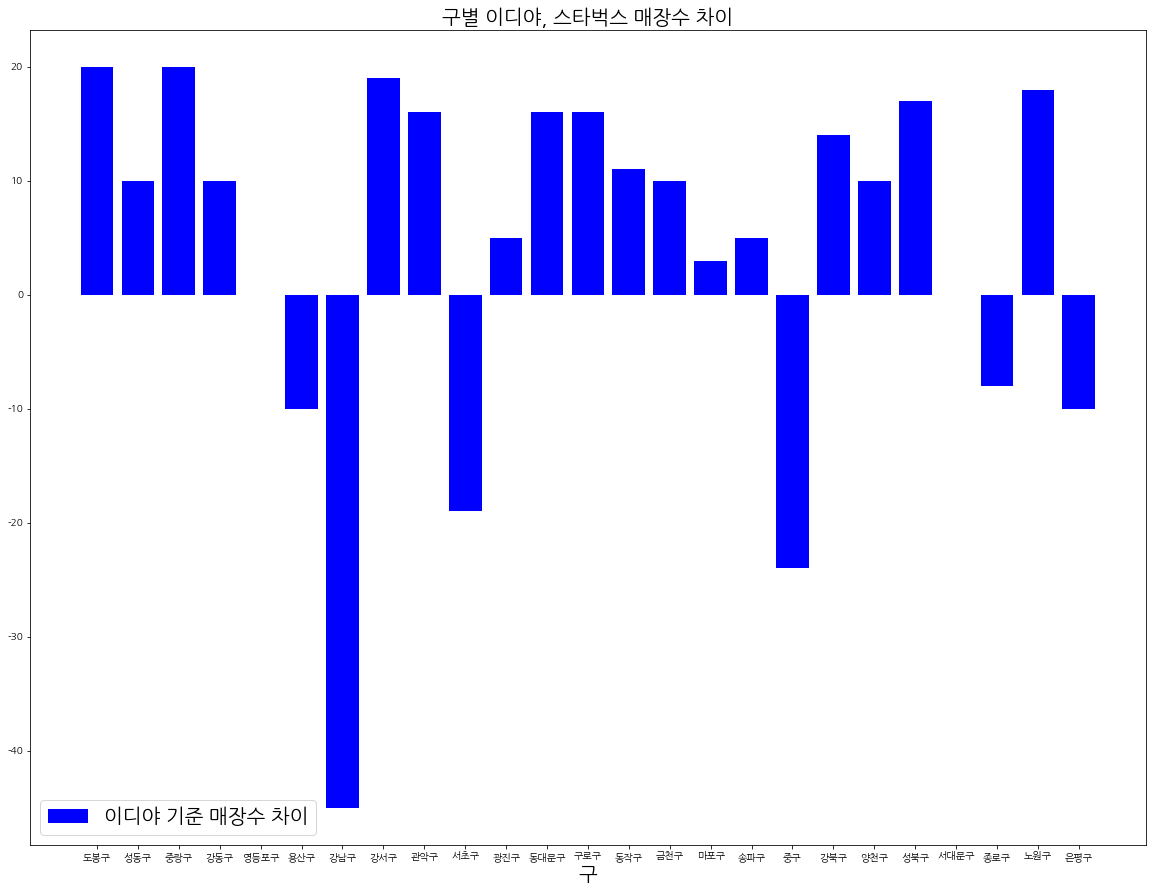

In [20]:
a = sum_data["매장 수 차이"]
y = "ediya"
plt.rcParams['axes.unicode_minus'] = False
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(20,15))
plt.bar(sum_data["구"], a, color = 'b', label ="이디야 기준 매장수 차이" )
plt.title("구별 이디야, 스타벅스 매장수 차이", fontsize = 20)
plt.xlabel("구", fontsize = 20)
plt.legend(loc ='lower left', fontsize = 20)
plt.show()
